### Initialise

In [18]:
from skimage import io
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

### Show original image

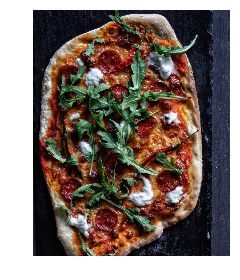

In [19]:
image = io.imread('pizza.jpg')
io.imshow(image)
plt.axis('off')
io.show()

### Check image dimensions

In [20]:
row = image.shape[0]
col = image.shape[1]
print('Image dimensions: {} x {}'.format(col,row))

Image dimensions: 750 x 937


### Preparing image data

In [21]:
data = image.reshape(row*col,3)
empty = np.zeros_like(data)

### Fitting Kmeans and compressing image

Defining function to compress image with Kmeans

In [27]:
def compress(data,i):
    # training Kmeans
    kmeans = KMeans(n_clusters=i).fit(data)
    
    # map color to compressed value
    color = kmeans.predict(data)
    
    # grouping colors
    for k in range(i):
        empty[color == k] = kmeans.cluster_centers_[k]
    
    # reshape data and display output image
    new_img = empty.reshape((row, col, 3))
    plt.axis('off')
    plt.title('Compressed image - {} colors'.format(i))
    plt.imshow(new_img)
    plt.show()

Displaying image with different number of colors, being 3, 5, 10, 15, 20, 25

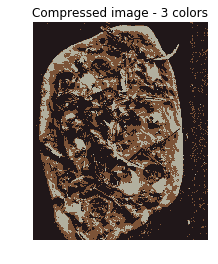

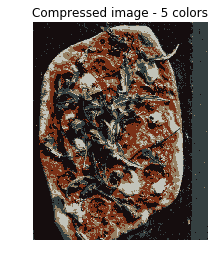

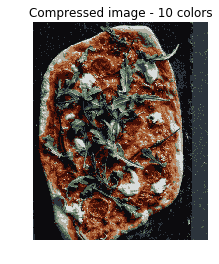

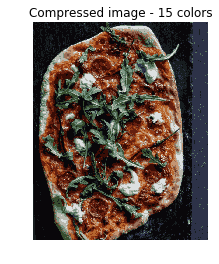

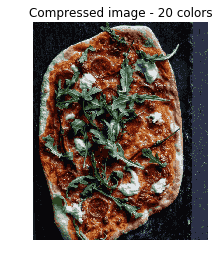

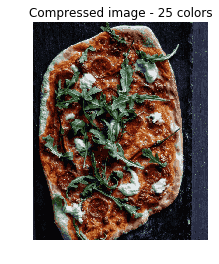

In [35]:
for k in [3, 5,10,15,20,25]:
    compress(data,k)